In [1]:
import xgboost as xgb
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

C:\Programs\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
X_with_columns = pd.read_pickle("pickle_files/X.pkl")
Z_with_columns = pd.read_pickle("pickle_files/Z.pkl")

columns_to_drop = []

X_with_columns.drop(columns_to_drop, axis = 1, inplace=True)
Z_with_columns.drop(columns_to_drop, axis = 1, inplace=True)

X = np.array(X_with_columns)
Y = np.array(pd.read_pickle("pickle_files/Y.pkl"))
Z = np.array(Z_with_columns)
df_next_games = pd.read_pickle("pickle_files/next_games.pkl")

In [3]:
kf = KFold(n_splits=4, random_state=0, shuffle=True)
kf.get_n_splits(X)

4

In [4]:
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

TRAIN: [  2   3   4   5   6   7   8   9  11  13  16  18  19  20  22  23  24  25
  26  27  28  29  30  32  33  35  36  38  39  40  41  42  43  44  47  49
  50  51  53  54  56  57  58  59  60  61  62  63  65  67  68  69  70  72
  73  74  76  77  79  80  81  82  83  84  86  87  88  91  93  94  95  97
  98  99 100 101 104 105 106 109 110 111 112 113 114 115 116 117 119 120
 121 123 124 125 126 128 129 130 131 133 134 135 136 137 138 139 140 141
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 158 159 160 161
 163 164 166 167 168 169 171 174 175 176 177 179 180 182 183 184 185 187
 188 189 191 192 193 194 195 196 197 198 199 200 201 203 204 207 208 209
 212 214 215 216 217 218 219 220 221 222 223 225 226 227 228 231 232 234
 237 238 239 241 243 244 248 249 250 251 253 254 255 256 257 258 259 260
 261 264 265 266 267 269 270 271 273 274 275 276 277 278 279 280 281 284
 286 287 288 289 290 291 292 294 295 296 297 298 299 300 301 302 303 304
 305 306 307 309 311 312 314 317 318 319 321

## XGBoost

In [5]:
XGB_model = xgb.XGBClassifier(silent=False, 
                      learning_rate=0.005,  
                      colsample_bytree = 0.5,
                      subsample = 0.8,
                      objective='multi:softprob', 
                      n_estimators=1000, 
                      reg_alpha = 0.2,
                      reg_lambda = .5,
                      max_depth=5, 
                      gamma=5,
                      seed=82)

In [6]:
eval_set = [(X_train, y_train), (X_test, y_test)]

XGB_model.fit(X_train, y_train, eval_metric=["merror", "mlogloss"], eval_set=eval_set, verbose=True)
y_pred = XGB_model.predict(X_test)
y_pred_train = XGB_model.predict(X_train)
accuracy = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, y_pred_train)

[17:10:48] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-merror:0.08428	validation_0-mlogloss:1.09305	validation_1-merror:0.12329	validation_1-mlogloss:1.09329
[1]	validation_0-merror:0.02278	validation_0-mlogloss:1.08638	validation_1-merror:0.01370	validation_1-mlogloss:1.08657
[2]	validation_0-merror:0.00000	validation_0-mlogloss:1.07909	validation_1-merror:0.00000	validation_1-mlogloss:1.07928
[3]	validation_0-merror:0.00000	validation_0-mlogloss:1.07300	validation_1-merror:0.00000	validation_1-mlogloss:1.07325
[4]	validation_0-merror:0.00000	validation_0-mlogloss:1.06693	validation_1-merror:0.00000	validation_1-mlogloss:1.06739
[5]	validation_0-merror:0.00000	validation_

[65]	validation_0-merror:0.00000	validation_0-mlogloss:0.75493	validation_1-merror:0.00000	validation_1-mlogloss:0.75931
[66]	validation_0-merror:0.00000	validation_0-mlogloss:0.75037	validation_1-merror:0.00000	validation_1-mlogloss:0.75473
[67]	validation_0-merror:0.00000	validation_0-mlogloss:0.74645	validation_1-merror:0.00000	validation_1-mlogloss:0.75081
[68]	validation_0-merror:0.00000	validation_0-mlogloss:0.74245	validation_1-merror:0.00000	validation_1-mlogloss:0.74691
[69]	validation_0-merror:0.00000	validation_0-mlogloss:0.73873	validation_1-merror:0.00000	validation_1-mlogloss:0.74315
[70]	validation_0-merror:0.00000	validation_0-mlogloss:0.73503	validation_1-merror:0.00000	validation_1-mlogloss:0.73966
[71]	validation_0-merror:0.00000	validation_0-mlogloss:0.73139	validation_1-merror:0.00000	validation_1-mlogloss:0.73593
[72]	validation_0-merror:0.00000	validation_0-mlogloss:0.72752	validation_1-merror:0.00000	validation_1-mlogloss:0.73211
[73]	validation_0-merror:0.00000

[133]	validation_0-merror:0.00000	validation_0-mlogloss:0.52991	validation_1-merror:0.00000	validation_1-mlogloss:0.53508
[134]	validation_0-merror:0.00000	validation_0-mlogloss:0.52692	validation_1-merror:0.00000	validation_1-mlogloss:0.53207
[135]	validation_0-merror:0.00000	validation_0-mlogloss:0.52395	validation_1-merror:0.00000	validation_1-mlogloss:0.52907
[136]	validation_0-merror:0.00000	validation_0-mlogloss:0.52142	validation_1-merror:0.00000	validation_1-mlogloss:0.52660
[137]	validation_0-merror:0.00000	validation_0-mlogloss:0.51891	validation_1-merror:0.00000	validation_1-mlogloss:0.52408
[138]	validation_0-merror:0.00000	validation_0-mlogloss:0.51598	validation_1-merror:0.00000	validation_1-mlogloss:0.52113
[139]	validation_0-merror:0.00000	validation_0-mlogloss:0.51365	validation_1-merror:0.00000	validation_1-mlogloss:0.51883
[140]	validation_0-merror:0.00000	validation_0-mlogloss:0.51076	validation_1-merror:0.00000	validation_1-mlogloss:0.51592
[141]	validation_0-merro

[201]	validation_0-merror:0.00000	validation_0-mlogloss:0.38404	validation_1-merror:0.00000	validation_1-mlogloss:0.38923
[202]	validation_0-merror:0.00000	validation_0-mlogloss:0.38272	validation_1-merror:0.00000	validation_1-mlogloss:0.38793
[203]	validation_0-merror:0.00000	validation_0-mlogloss:0.38099	validation_1-merror:0.00000	validation_1-mlogloss:0.38619
[204]	validation_0-merror:0.00000	validation_0-mlogloss:0.37893	validation_1-merror:0.00000	validation_1-mlogloss:0.38410
[205]	validation_0-merror:0.00000	validation_0-mlogloss:0.37724	validation_1-merror:0.00000	validation_1-mlogloss:0.38237
[206]	validation_0-merror:0.00000	validation_0-mlogloss:0.37569	validation_1-merror:0.00000	validation_1-mlogloss:0.38086
[207]	validation_0-merror:0.00000	validation_0-mlogloss:0.37468	validation_1-merror:0.00000	validation_1-mlogloss:0.37990
[208]	validation_0-merror:0.00000	validation_0-mlogloss:0.37266	validation_1-merror:0.00000	validation_1-mlogloss:0.37785
[209]	validation_0-merro

[269]	validation_0-merror:0.00000	validation_0-mlogloss:0.28213	validation_1-merror:0.00000	validation_1-mlogloss:0.28679
[270]	validation_0-merror:0.00000	validation_0-mlogloss:0.28099	validation_1-merror:0.00000	validation_1-mlogloss:0.28563
[271]	validation_0-merror:0.00000	validation_0-mlogloss:0.27951	validation_1-merror:0.00000	validation_1-mlogloss:0.28413
[272]	validation_0-merror:0.00000	validation_0-mlogloss:0.27804	validation_1-merror:0.00000	validation_1-mlogloss:0.28264
[273]	validation_0-merror:0.00000	validation_0-mlogloss:0.27693	validation_1-merror:0.00000	validation_1-mlogloss:0.28151
[274]	validation_0-merror:0.00000	validation_0-mlogloss:0.27581	validation_1-merror:0.00000	validation_1-mlogloss:0.28037
[275]	validation_0-merror:0.00000	validation_0-mlogloss:0.27462	validation_1-merror:0.00000	validation_1-mlogloss:0.27917
[276]	validation_0-merror:0.00000	validation_0-mlogloss:0.27337	validation_1-merror:0.00000	validation_1-mlogloss:0.27791
[277]	validation_0-merro

[337]	validation_0-merror:0.00000	validation_0-mlogloss:0.20891	validation_1-merror:0.00000	validation_1-mlogloss:0.21287
[338]	validation_0-merror:0.00000	validation_0-mlogloss:0.20803	validation_1-merror:0.00000	validation_1-mlogloss:0.21198
[339]	validation_0-merror:0.00000	validation_0-mlogloss:0.20696	validation_1-merror:0.00000	validation_1-mlogloss:0.21090
[340]	validation_0-merror:0.00000	validation_0-mlogloss:0.20641	validation_1-merror:0.00000	validation_1-mlogloss:0.21035
[341]	validation_0-merror:0.00000	validation_0-mlogloss:0.20536	validation_1-merror:0.00000	validation_1-mlogloss:0.20927
[342]	validation_0-merror:0.00000	validation_0-mlogloss:0.20430	validation_1-merror:0.00000	validation_1-mlogloss:0.20821
[343]	validation_0-merror:0.00000	validation_0-mlogloss:0.20370	validation_1-merror:0.00000	validation_1-mlogloss:0.20761
[344]	validation_0-merror:0.00000	validation_0-mlogloss:0.20290	validation_1-merror:0.00000	validation_1-mlogloss:0.20680
[345]	validation_0-merro

[405]	validation_0-merror:0.00000	validation_0-mlogloss:0.15622	validation_1-merror:0.00000	validation_1-mlogloss:0.15965
[406]	validation_0-merror:0.00000	validation_0-mlogloss:0.15580	validation_1-merror:0.00000	validation_1-mlogloss:0.15921
[407]	validation_0-merror:0.00000	validation_0-mlogloss:0.15554	validation_1-merror:0.00000	validation_1-mlogloss:0.15898
[408]	validation_0-merror:0.00000	validation_0-mlogloss:0.15491	validation_1-merror:0.00000	validation_1-mlogloss:0.15833
[409]	validation_0-merror:0.00000	validation_0-mlogloss:0.15413	validation_1-merror:0.00000	validation_1-mlogloss:0.15754
[410]	validation_0-merror:0.00000	validation_0-mlogloss:0.15335	validation_1-merror:0.00000	validation_1-mlogloss:0.15675
[411]	validation_0-merror:0.00000	validation_0-mlogloss:0.15258	validation_1-merror:0.00000	validation_1-mlogloss:0.15596
[412]	validation_0-merror:0.00000	validation_0-mlogloss:0.15234	validation_1-merror:0.00000	validation_1-mlogloss:0.15575
[413]	validation_0-merro

[473]	validation_0-merror:0.00000	validation_0-mlogloss:0.12094	validation_1-merror:0.00000	validation_1-mlogloss:0.12387
[474]	validation_0-merror:0.00000	validation_0-mlogloss:0.12047	validation_1-merror:0.00000	validation_1-mlogloss:0.12339
[475]	validation_0-merror:0.00000	validation_0-mlogloss:0.12008	validation_1-merror:0.00000	validation_1-mlogloss:0.12299
[476]	validation_0-merror:0.00000	validation_0-mlogloss:0.11949	validation_1-merror:0.00000	validation_1-mlogloss:0.12238
[477]	validation_0-merror:0.00000	validation_0-mlogloss:0.11890	validation_1-merror:0.00000	validation_1-mlogloss:0.12178
[478]	validation_0-merror:0.00000	validation_0-mlogloss:0.11852	validation_1-merror:0.00000	validation_1-mlogloss:0.12139
[479]	validation_0-merror:0.00000	validation_0-mlogloss:0.11826	validation_1-merror:0.00000	validation_1-mlogloss:0.12113
[480]	validation_0-merror:0.00000	validation_0-mlogloss:0.11768	validation_1-merror:0.00000	validation_1-mlogloss:0.12053
[481]	validation_0-merro

[541]	validation_0-merror:0.00000	validation_0-mlogloss:0.09364	validation_1-merror:0.00000	validation_1-mlogloss:0.09601
[542]	validation_0-merror:0.00000	validation_0-mlogloss:0.09345	validation_1-merror:0.00000	validation_1-mlogloss:0.09581
[543]	validation_0-merror:0.00000	validation_0-mlogloss:0.09299	validation_1-merror:0.00000	validation_1-mlogloss:0.09534
[544]	validation_0-merror:0.00000	validation_0-mlogloss:0.09270	validation_1-merror:0.00000	validation_1-mlogloss:0.09504
[545]	validation_0-merror:0.00000	validation_0-mlogloss:0.09235	validation_1-merror:0.00000	validation_1-mlogloss:0.09468
[546]	validation_0-merror:0.00000	validation_0-mlogloss:0.09190	validation_1-merror:0.00000	validation_1-mlogloss:0.09422
[547]	validation_0-merror:0.00000	validation_0-mlogloss:0.09145	validation_1-merror:0.00000	validation_1-mlogloss:0.09376
[548]	validation_0-merror:0.00000	validation_0-mlogloss:0.09110	validation_1-merror:0.00000	validation_1-mlogloss:0.09341
[549]	validation_0-merro

[609]	validation_0-merror:0.00000	validation_0-mlogloss:0.07576	validation_1-merror:0.00000	validation_1-mlogloss:0.07780
[610]	validation_0-merror:0.00000	validation_0-mlogloss:0.07548	validation_1-merror:0.00000	validation_1-mlogloss:0.07752
[611]	validation_0-merror:0.00000	validation_0-mlogloss:0.07533	validation_1-merror:0.00000	validation_1-mlogloss:0.07737
[612]	validation_0-merror:0.00000	validation_0-mlogloss:0.07505	validation_1-merror:0.00000	validation_1-mlogloss:0.07709
[613]	validation_0-merror:0.00000	validation_0-mlogloss:0.07478	validation_1-merror:0.00000	validation_1-mlogloss:0.07681
[614]	validation_0-merror:0.00000	validation_0-mlogloss:0.07463	validation_1-merror:0.00000	validation_1-mlogloss:0.07666
[615]	validation_0-merror:0.00000	validation_0-mlogloss:0.07436	validation_1-merror:0.00000	validation_1-mlogloss:0.07638
[616]	validation_0-merror:0.00000	validation_0-mlogloss:0.07421	validation_1-merror:0.00000	validation_1-mlogloss:0.07623
[617]	validation_0-merro

[677]	validation_0-merror:0.00000	validation_0-mlogloss:0.06258	validation_1-merror:0.00000	validation_1-mlogloss:0.06437
[678]	validation_0-merror:0.00000	validation_0-mlogloss:0.06236	validation_1-merror:0.00000	validation_1-mlogloss:0.06415
[679]	validation_0-merror:0.00000	validation_0-mlogloss:0.06214	validation_1-merror:0.00000	validation_1-mlogloss:0.06393
[680]	validation_0-merror:0.00000	validation_0-mlogloss:0.06203	validation_1-merror:0.00000	validation_1-mlogloss:0.06381
[681]	validation_0-merror:0.00000	validation_0-mlogloss:0.06181	validation_1-merror:0.00000	validation_1-mlogloss:0.06359
[682]	validation_0-merror:0.00000	validation_0-mlogloss:0.06170	validation_1-merror:0.00000	validation_1-mlogloss:0.06347
[683]	validation_0-merror:0.00000	validation_0-mlogloss:0.06148	validation_1-merror:0.00000	validation_1-mlogloss:0.06325
[684]	validation_0-merror:0.00000	validation_0-mlogloss:0.06147	validation_1-merror:0.00000	validation_1-mlogloss:0.06324
[685]	validation_0-merro

[745]	validation_0-merror:0.00000	validation_0-mlogloss:0.05286	validation_1-merror:0.00000	validation_1-mlogloss:0.05447
[746]	validation_0-merror:0.00000	validation_0-mlogloss:0.05276	validation_1-merror:0.00000	validation_1-mlogloss:0.05437
[747]	validation_0-merror:0.00000	validation_0-mlogloss:0.05258	validation_1-merror:0.00000	validation_1-mlogloss:0.05419
[748]	validation_0-merror:0.00000	validation_0-mlogloss:0.05249	validation_1-merror:0.00000	validation_1-mlogloss:0.05409
[749]	validation_0-merror:0.00000	validation_0-mlogloss:0.05240	validation_1-merror:0.00000	validation_1-mlogloss:0.05400
[750]	validation_0-merror:0.00000	validation_0-mlogloss:0.05222	validation_1-merror:0.00000	validation_1-mlogloss:0.05382
[751]	validation_0-merror:0.00000	validation_0-mlogloss:0.05221	validation_1-merror:0.00000	validation_1-mlogloss:0.05381
[752]	validation_0-merror:0.00000	validation_0-mlogloss:0.05212	validation_1-merror:0.00000	validation_1-mlogloss:0.05372
[753]	validation_0-merro

[813]	validation_0-merror:0.00000	validation_0-mlogloss:0.04658	validation_1-merror:0.00000	validation_1-mlogloss:0.04812
[814]	validation_0-merror:0.00000	validation_0-mlogloss:0.04650	validation_1-merror:0.00000	validation_1-mlogloss:0.04804
[815]	validation_0-merror:0.00000	validation_0-mlogloss:0.04642	validation_1-merror:0.00000	validation_1-mlogloss:0.04796
[816]	validation_0-merror:0.00000	validation_0-mlogloss:0.04634	validation_1-merror:0.00000	validation_1-mlogloss:0.04788
[817]	validation_0-merror:0.00000	validation_0-mlogloss:0.04634	validation_1-merror:0.00000	validation_1-mlogloss:0.04787
[818]	validation_0-merror:0.00000	validation_0-mlogloss:0.04633	validation_1-merror:0.00000	validation_1-mlogloss:0.04787
[819]	validation_0-merror:0.00000	validation_0-mlogloss:0.04632	validation_1-merror:0.00000	validation_1-mlogloss:0.04786
[820]	validation_0-merror:0.00000	validation_0-mlogloss:0.04624	validation_1-merror:0.00000	validation_1-mlogloss:0.04778
[821]	validation_0-merro

[881]	validation_0-merror:0.00000	validation_0-mlogloss:0.04517	validation_1-merror:0.00000	validation_1-mlogloss:0.04675
[882]	validation_0-merror:0.00000	validation_0-mlogloss:0.04516	validation_1-merror:0.00000	validation_1-mlogloss:0.04675
[883]	validation_0-merror:0.00000	validation_0-mlogloss:0.04516	validation_1-merror:0.00000	validation_1-mlogloss:0.04675
[884]	validation_0-merror:0.00000	validation_0-mlogloss:0.04516	validation_1-merror:0.00000	validation_1-mlogloss:0.04675
[885]	validation_0-merror:0.00000	validation_0-mlogloss:0.04515	validation_1-merror:0.00000	validation_1-mlogloss:0.04674
[886]	validation_0-merror:0.00000	validation_0-mlogloss:0.04515	validation_1-merror:0.00000	validation_1-mlogloss:0.04674
[887]	validation_0-merror:0.00000	validation_0-mlogloss:0.04507	validation_1-merror:0.00000	validation_1-mlogloss:0.04666
[888]	validation_0-merror:0.00000	validation_0-mlogloss:0.04507	validation_1-merror:0.00000	validation_1-mlogloss:0.04666
[889]	validation_0-merro

[949]	validation_0-merror:0.00000	validation_0-mlogloss:0.04446	validation_1-merror:0.00000	validation_1-mlogloss:0.04609
[950]	validation_0-merror:0.00000	validation_0-mlogloss:0.04446	validation_1-merror:0.00000	validation_1-mlogloss:0.04609
[951]	validation_0-merror:0.00000	validation_0-mlogloss:0.04446	validation_1-merror:0.00000	validation_1-mlogloss:0.04608
[952]	validation_0-merror:0.00000	validation_0-mlogloss:0.04445	validation_1-merror:0.00000	validation_1-mlogloss:0.04608
[953]	validation_0-merror:0.00000	validation_0-mlogloss:0.04445	validation_1-merror:0.00000	validation_1-mlogloss:0.04608
[954]	validation_0-merror:0.00000	validation_0-mlogloss:0.04445	validation_1-merror:0.00000	validation_1-mlogloss:0.04608
[955]	validation_0-merror:0.00000	validation_0-mlogloss:0.04445	validation_1-merror:0.00000	validation_1-mlogloss:0.04608
[956]	validation_0-merror:0.00000	validation_0-mlogloss:0.04445	validation_1-merror:0.00000	validation_1-mlogloss:0.04608
[957]	validation_0-merro

In [7]:
y_pred.shape

(146,)

In [8]:
pd.Series(y_pred).value_counts()

3.0    69
1.0    64
2.0    13
dtype: int64

## LogisticRegression

In [9]:
LR = LogisticRegression(random_state = 42)
LR.fit(X_train, y_train)
LR_y_pred = LR.predict(X_test)
LR_y_pred_train = LR.predict(X_train)
LR_accuracy = accuracy_score(y_test, LR_y_pred)
LR_accuracy_train = accuracy_score(y_train, LR_y_pred_train)

In [10]:
pd.Series(LR_y_pred).value_counts()

3.0    79
1.0    67
dtype: int64

## Comparison

In [11]:
print("XGB train Accuracy: %.2f%%" % (accuracy_train * 100.0))
print("XGB Accuracy: %.2f%%" % (accuracy * 100.0))
print("LR train Accuracy: %.2f%%" % (LR_accuracy_train * 100.0))
print("LR Accuracy: %.2f%%" % (LR_accuracy * 100.0))

XGB train Accuracy: 100.00%
XGB Accuracy: 100.00%
LR train Accuracy: 88.84%
LR Accuracy: 89.04%


In [12]:
features_names = list(X_with_columns.columns)

In [13]:
importance = np.round(XGB_model.feature_importances_,4)
dictionary = dict(zip(features_names, importance))
sorted_dictionary=sorted(dictionary.items(), key=lambda x:x[1], reverse=True)
names=[]
values=[]
for i in range(0, len(importance)):
    print('Feature Importance: {:35} {}%'.format(
        sorted_dictionary[i][0], np.round(sorted_dictionary[i][1]*100,4))
         )
    names.append(sorted_dictionary[i][0])
    values.append(np.round(sorted_dictionary[i][1]*100,4))

Feature Importance: HTGDIFF                             17.98%
Feature Importance: awayTeamScore.minutesInFront        16.7%
Feature Importance: ATGDIFF                             16.58%
Feature Importance: homeTeamScore.minutesInFront        15.99%
Feature Importance: homeTeamScoreChart.goals            6.73%
Feature Importance: awayTeamScore.matchScore.totalScore 6.22%
Feature Importance: homeTeamScore.matchScore.totalScore 6.03%
Feature Importance: awayTeamScoreChart.goals            5.9%
Feature Importance: H_HTGDIFF_1                         4.04%
Feature Importance: AVGHTGDIFF                          3.83%
Feature Importance: round.year                          0.0%


In [14]:
cum_values = np.cumsum(values)
values_over_95 = (cum_values > 95).sum()
columns_over_95 = names[-values_over_95:]
columns_over_95

['H_HTGDIFF_1', 'AVGHTGDIFF', 'round.year']

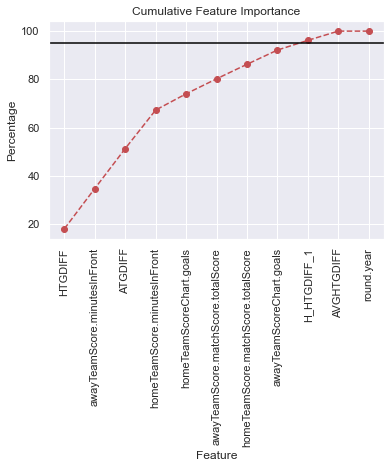

In [15]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
#bottom, top = ylim()
bottom = 0
plt.plot(names,cum_values, '--bo', color='r')
# set importance at 95%
plt.axhline(95,color='black')
plt.xticks(rotation=90);
plt.xlabel('Feature'); 
plt.ylabel('Percentage'); 
plt.title('Cumulative Feature Importance');

In [16]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred, classes, labels,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    classes=classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    #plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             #rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Normalized confusion matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


<AxesSubplot:title={'center':'Confusion matrix, with normalization'}, xlabel='Predicted label', ylabel='True label'>

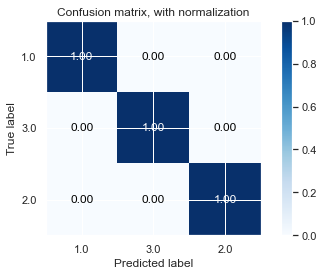

In [17]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=pd.Series(Y).unique(), labels=pd.Series(Y).unique(),
                      title='Confusion matrix, with normalization', normalize=True)

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def learning_curve(preds,y_test, model):
    predictions = [round(value) for value in preds]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    # retrieve performance metrics
    results = model.evals_result()
    epochs = len(results['validation_0']['merror'])
    x_axis = range(0, epochs)
    # plot log loss
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['merror'], label='Train')
    ax.plot(x_axis, results['validation_1']['merror'], label='Test')
    ax.legend()
    plt.ylabel('Log Loss')
    plt.title('XGBoost Log Loss')
    plt.show()
    # plot classification error
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['merror'], label='Train')
    ax.plot(x_axis, results['validation_1']['merror'], label='Test')
    ax.legend()
    plt.ylabel('Classification Error')
    plt.title('XGBoost Classification Error')
    plt.show()

Accuracy: 100.00%


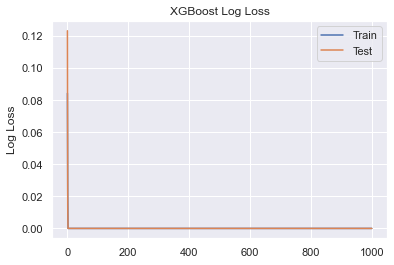

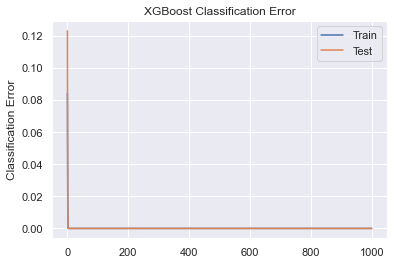

In [19]:
learning_curve(y_pred,y_test,XGB_model)

## Predict Result for Next Games

In [20]:
z_pred = XGB_model.predict(Z)

In [21]:
xgb_df_next_games = df_next_games.copy()

In [22]:
xgb_df_next_games['predicted_result'] = z_pred

In [23]:
xgb_df_next_games

,match.homeTeam.name,match.awayTeam.name,predicted_result
9,Western Bulldogs,Carlton,1.0
10,Sydney Swans,Geelong Cats,1.0
11,Collingwood,Adelaide Crows,1.0
12,Essendon,Brisbane Lions,1.0
13,Port Adelaide,Hawthorn,1.0
14,Gold Coast Suns,Melbourne,1.0
15,North Melbourne,West Coast Eagles,1.0
16,Richmond,GWS Giants,3.0
17,Fremantle,St Kilda,3.0


In [24]:
 z_pred_prob = XGB_model.predict_proba(Z)

In [25]:
xgb_df_next_games['prob_loss'] = z_pred_prob[:,0]
xgb_df_next_games['prob_draw'] = z_pred_prob[:,1]
xgb_df_next_games['prob_win'] = z_pred_prob[:,2]

In [26]:
xgb_df_next_games

,match.homeTeam.name,match.awayTeam.name,predicted_result,prob_loss,prob_draw,prob_win
9,Western Bulldogs,Carlton,1.0,0.954520,0.021110,0.024370
10,Sydney Swans,Geelong Cats,1.0,0.954520,0.021110,0.024370
11,Collingwood,Adelaide Crows,1.0,0.649946,0.062036,0.288018
12,Essendon,Brisbane Lions,1.0,0.954712,0.021130,0.024158
13,Port Adelaide,Hawthorn,1.0,0.686857,0.055309,0.257834
14,Gold Coast Suns,Melbourne,1.0,0.954712,0.021130,0.024158
15,North Melbourne,West Coast Eagles,1.0,0.954712,0.021130,0.024158
16,Richmond,GWS Giants,3.0,0.026525,0.019969,0.953507
17,Fremantle,St Kilda,3.0,0.026751,0.020153,0.953096
